In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.ticker as ticker

In [334]:
# carga csvs
acceso_fijo_pcia = pd.read_csv('csvs\Internet\Acceso_Internet_fijo_por_tecnología_y_provincia.csv')
conectividad_Localidades = pd.read_csv('csvs\Internet\Conectividad_al_servicio_Internet.csv')
ingresos_trimestrales = pd.read_csv('csvs\Internet\Ingresos_trimestrales_prestación_servicio_Internet_fijo.csv')
Bajada_Localidad = pd.read_csv('csvs\Internet\Accesos_Internet_fijo_por_velocidad_bajada_y _ocalidad.csv')
Tecnologia_Localidad = pd.read_csv('csvs\Internet\Accesos_Internet_fijo_por_tecnología_y_localidad.csv')
acceso_100H = pd.read_csv('csvs\Internet\Penetración_de _Internet fijo _(accesos _cada_100 hogares).csv')

In [177]:
## Accedemos a ver la info del df.acceso fijo por provincia, columnas, valores faltantes y tipo.

acceso_fijo_pcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           793 non-null    object 
 1   Trimestre     793 non-null    object 
 2   Provincia     792 non-null    object 
 3   ADSL          792 non-null    object 
 4   Cablemodem    792 non-null    object 
 5   Fibra óptica  792 non-null    object 
 6   Wireless      792 non-null    object 
 7   Otros         792 non-null    float64
 8   Total         792 non-null    object 
dtypes: float64(1), object(8)
memory usage: 55.9+ KB


In [179]:
# tenemos registro hasta el 1 trimestre de 2022
acceso_fijo_pcia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.872,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.934,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.234,62.378
3,2022,1,Chaco,32.391,64.546,36.662,8.164,2.356,144.119
4,2022,1,Chubut,44.133,66.667,9.184,30.592,21.052,171.628


In [180]:
#El primer registro comienza en 2014, primer trimestre
acceso_fijo_pcia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
788,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
789,2014,1,Santiago Del Estero,32.567,3.598,19,915,34.000,37.133
790,2014,1,Tierra Del Fuego,21.618,2.837,648,1,2.934,28.038
791,2014,1,Tucumán,129.717,83,121,13,98.000,130.032
792,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
acceso_fijo_pcia['Año'].value_counts()

2021      96
2020      96
2018      96
2017      96
2016      96
2015      96
2014      96
2019 *    72
2022      24
2019      24
*          1
Name: Año, dtype: int64

In [182]:
## Vemos los años que tienen registro y notamos que el año 2019 está repetido. Esto es un problema a resolver. 
## También hay una fila con un *. 
acceso_fijo_pcia['Año'].value_counts()

2021      96
2020      96
2018      96
2017      96
2016      96
2015      96
2014      96
2019 *    72
2022      24
2019      24
*          1
Name: Año, dtype: int64

In [183]:
### Revisamos la info de esa fila y nos explica lo que ocurre con ese año (2019*)

acceso_fijo_pcia.loc[acceso_fijo_pcia['Trimestre'] == 'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.', ['Año', 'Provincia', 'Trimestre', 'ADSL','Otros']]

,Año,Provincia,Trimestre,ADSL,Otros
792,*,NaN,Los datos provinciales no coinciden a nivel na...,NaN,NaN


In [184]:
## vemos que solo tenemos informacion del trimestre 4 en el año 2019

acceso_fijo_pcia.loc[acceso_fijo_pcia['Año']== '2019']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
216,2019,4,Buenos Aires,720.011,2.191.672,669.194,87.111,18.266,3.686.254
217,2019,4,Capital Federal,196.938,1.093.143,35.534,3.914,28.576,1.358.105
218,2019,4,Catamarca,22.999,3.318,9.506,261,2.227,38.311
219,2019,4,Chaco,48.661,53.602,8.831,5.229,1.580,117.903
220,2019,4,Chubut,47.045,26.977,1.324,15.267,5.489,96.102
221,2019,4,Córdoba,296.872,410.038,53.335,37.750,8.693,806.688
222,2019,4,Corrientes,52.525,51.845,2.002,2.458,5.004,113.834
223,2019,4,Entre Ríos,92.981,99.206,12.875,18.561,15.407,239.030
224,2019,4,Formosa,21.567,8.684,1.760,14.531,169.000,46.711
225,2019,4,Jujuy,32.949,37.604,873,814,16.641,88.881


In [185]:
## son 72 filas, de la fila 240 a la 311
acceso_fijo_pcia.loc[acceso_fijo_pcia['Año'] == '2019 *', ['Año', 'Provincia', 'Trimestre', 'ADSL','Otros']]

,Año,Provincia,Trimestre,ADSL,Otros
240,2019 *,Buenos Aires,3 *,1.277.249,27.070
241,2019 *,Capital Federal,3 *,300.288,31.155
242,2019 *,Catamarca,3 *,24.349,2.251
243,2019 *,Chaco,3 *,50.416,1.592
244,2019 *,Chubut,3 *,37.298,7.551
...,...,...,...,...,...
307,2019 *,Santa Cruz,1 *,10.659,2.735
308,2019 *,Santa Fe,1 *,340.038,17.860
309,2019 *,Santiago Del Estero,1 *,25.337,99.000
310,2019 *,Tierra Del Fuego,1 *,19.789,1.486


In [186]:
## creamos un nuevo df con los datos "polemicos"

df_2019 = acceso_fijo_pcia.loc[acceso_fijo_pcia['Año'] == '2019 *']

In [187]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 240 to 311
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           72 non-null     object 
 1   Trimestre     72 non-null     object 
 2   Provincia     72 non-null     object 
 3   ADSL          72 non-null     object 
 4   Cablemodem    72 non-null     object 
 5   Fibra óptica  72 non-null     object 
 6   Wireless      72 non-null     object 
 7   Otros         72 non-null     float64
 8   Total         72 non-null     object 
dtypes: float64(1), object(8)
memory usage: 5.6+ KB


In [188]:
## completa el año 2019 con los trimestres 1,2 y 3

df_2019['Trimestre'].value_counts()

3 *    24
2 *    24
1 *    24
Name: Trimestre, dtype: int64

In [189]:
## procedemos a unir los años 2019 y 2019 *. Borramos la fila con la indicación *
acceso_fijo_pcia.loc[acceso_fijo_pcia['Año'] == '2019 *', 'Año'] = '2019'
acceso_fijo_pcia['Año'].value_counts()
acceso_fijo_pcia = acceso_fijo_pcia.drop(792)
acceso_fijo_pcia.tail()


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
787,2014,1,Santa Cruz,18.927,100,381,4.092,3.264,26.764
788,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
789,2014,1,Santiago Del Estero,32.567,3.598,19,915,34.000,37.133
790,2014,1,Tierra Del Fuego,21.618,2.837,648,1,2.934,28.038
791,2014,1,Tucumán,129.717,83,121,13,98.000,130.032


In [190]:
## completa el año 2019 con los trimestres 1,2 y 3

acceso_fijo_pcia.loc[acceso_fijo_pcia['Trimestre'] == '1 *', 'Trimestre'] = '1'
acceso_fijo_pcia.loc[acceso_fijo_pcia['Trimestre'] == '2 *', 'Trimestre'] = '2'
acceso_fijo_pcia.loc[acceso_fijo_pcia['Trimestre'] == '3 *', 'Trimestre'] = '3'
acceso_fijo_pcia['Trimestre'].value_counts()


1    216
4    192
3    192
2    192
Name: Trimestre, dtype: int64

In [191]:
acceso_fijo_pcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           792 non-null    object 
 1   Trimestre     792 non-null    object 
 2   Provincia     792 non-null    object 
 3   ADSL          792 non-null    object 
 4   Cablemodem    792 non-null    object 
 5   Fibra óptica  792 non-null    object 
 6   Wireless      792 non-null    object 
 7   Otros         792 non-null    float64
 8   Total         792 non-null    object 
dtypes: float64(1), object(8)
memory usage: 55.8+ KB


In [192]:
acceso_fijo_pcia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.872,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.934,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.234,62.378
3,2022,1,Chaco,32.391,64.546,36.662,8.164,2.356,144.119
4,2022,1,Chubut,44.133,66.667,9.184,30.592,21.052,171.628


In [193]:
## cambiamos el tipo de valor de las columnas a categorico y enteros para usarlas luego en el EDA

acceso_fijo_pcia['Año']= acceso_fijo_pcia['Año'].astype('category')
acceso_fijo_pcia['Trimestre']= acceso_fijo_pcia['Trimestre'].astype('category')
acceso_fijo_pcia['Provincia']= acceso_fijo_pcia['Provincia'].astype('category')
acceso_fijo_pcia['ADSL']=acceso_fijo_pcia['ADSL'].str.replace('.', '').astype(int)
acceso_fijo_pcia['Cablemodem']=  acceso_fijo_pcia['Cablemodem'].str.replace(r'\D', '', regex=True).astype(int)
acceso_fijo_pcia['Fibra óptica']= acceso_fijo_pcia['Fibra óptica'].str.replace(r'\D', '', regex=True).astype(int)
acceso_fijo_pcia['Wireless']= acceso_fijo_pcia['Wireless'].str.replace(r'\D', '', regex=True).astype(int)
acceso_fijo_pcia['Otros']= acceso_fijo_pcia['Otros'].replace('.', '').astype(int)
acceso_fijo_pcia['Total']=acceso_fijo_pcia['Total'].str.replace('.', '').astype(int)


C:\Users\User\AppData\Local\Temp\ipykernel_9300\2146274452.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acceso_fijo_pcia['ADSL']=acceso_fijo_pcia['ADSL'].str.replace('.', '').astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_9300\2146274452.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  acceso_fijo_pcia['Total']=acceso_fijo_pcia['Total'].str.replace('.', '').astype(int)


In [194]:
acceso_fijo_pcia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           792 non-null    category
 1   Trimestre     792 non-null    category
 2   Provincia     792 non-null    category
 3   ADSL          792 non-null    int32   
 4   Cablemodem    792 non-null    int32   
 5   Fibra óptica  792 non-null    int32   
 6   Wireless      792 non-null    int32   
 7   Otros         792 non-null    int32   
 8   Total         792 non-null    int32   
dtypes: category(3), int32(6)
memory usage: 22.3 KB


# EDA 
---

### DESARROLLO A NIVEL NACIONAL DE TECNOLOGIAS DE CONECTIVIDAD A INTERNET

**Se aprecia una caida anual de conexiones por ADSL a partir del año 2018 , un crecimiento progresivo de cablemodem y wireless. Y lo que nos interesa, un crecimiento exponencial de Fibra Óptica. 
pasando de 2.450.177 en 2019 a 4.636.620 en el año 2020, 6.473.506 en 2021 y en el primer trimestre de 2022 a 2.219.533. Se espera para lo que resta del 2022 que llegue a 8.500.00**

In [22]:
#Veamos el desarrollo historico de las diferentes tecnologias de conectividad. 

hist_acceso = (
    acceso_fijo_pcia.groupby('Año').sum()
    .reset_index()
)

hist_acceso

C:\Users\User\AppData\Local\Temp\ipykernel_9300\2618818380.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acceso_fijo_pcia.groupby('Año').sum()


,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,14884750,9975087,604862,305234,13070,26056633
1,2015,15115694,11162971,620877,331431,12717,27473819
2,2016,15073814,12177088,680127,337396,12783,28496058
3,2017,14639302,14148063,766312,432844,7235,30330683
4,2018,13981984,16571272,1079124,870047,4759,32968187
5,2019,12188858,18754974,2450177,1262831,4939,35566181
6,2020,9072828,20539964,4636620,1563813,11335,36771243
7,2021,7802044,22877010,6473506,1927038,12005,40086391
8,2022,1533240,6073426,2219533,545814,2450,10624009


## Porcentaje que ocupa cada técnologia por año

**Como resultado podemos apreciar como la conexión por fibra óptica
ocupa el segundo lugar en el 2022, con un 21.39% del total de conectividad nacional.**

In [282]:
# Calcular los porcentajes de cada tecnología por año
porcentajes = hist_acceso[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].apply(
    lambda x: (x / x.sum()) * 100, axis=1)

# Agregar los porcentajes al DataFrame original
hist_acceso_en_porcentajes = porcentajes
# Mostrar el DataFrame con los porcentajes redondeados en 2 decimales
hist_acceso_en_porcentajes = hist_acceso_en_porcentajes.round(2)
Años = ['2014', '2015', '2016', '2017','2018','2019','2020','2021', '2022']
hist_acceso_en_porcentajes['Años']= Años
print(hist_acceso_en_porcentajes)

    ADSL  Cablemodem  Fibra óptica  Wireless  Otros  Años
0  57.73       38.69          2.35      1.18   0.05  2014
1  55.48       40.97          2.28      1.22   0.05  2015
2  53.30       43.06          2.40      1.19   0.05  2016
3  48.81       47.17          2.55      1.44   0.02  2017
4  43.01       50.98          3.32      2.68   0.01  2018
5  35.17       54.11          7.07      3.64   0.01  2019
6  25.33       57.33         12.94      4.37   0.03  2020
7  19.96       58.52         16.56      4.93   0.03  2021
8  14.78       58.54         21.39      5.26   0.02  2022


#  Total de ingresos Anuales por Tecnología. 

In [283]:
ingresos_trimestrales['Año']= ingresos_trimestrales['Año'].astype('category')
ingresos_trimestrales['Trimestre']= ingresos_trimestrales['Trimestre'].astype('category')
ingresos_trimestrales['Ingresos (miles de pesos)']= ingresos_trimestrales['Ingresos (miles de pesos)'].str.replace('.', '').astype(int)
ingresos_trimestrales['Periodo']= ingresos_trimestrales['Periodo'].astype('category')
ingresos_anuales = ingresos_trimestrales.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()
ingresos_anuales

C:\Users\User\AppData\Local\Temp\ipykernel_9300\382035873.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ingresos_trimestrales['Ingresos (miles de pesos)']= ingresos_trimestrales['Ingresos (miles de pesos)'].str.replace('.', '').astype(int)


,Año,Ingresos (miles de pesos)
0,2014,13683949
1,2015,20108814
2,2016,26867508
3,2017,39671973
4,2018,59539594
5,2019,86772531
6,2020,127585840
7,2021,163383869
8,2022,51432896


## Para el primer trimestre de 2022 los ingresos nacionales por fibra óptica ocupan el segundo lugar con un total de $ 11.001.496	

In [317]:
Ingresos_Anuales_x_Tecnologia = pd.DataFrame()
Ingresos_Anuales_x_Tecnologia['Año'] = ingresos_anuales['Año']
Ingresos_Anuales_x_Tecnologia['ADSL'] = (hist_acceso_en_porcentajes['ADSL'] * ingresos_anuales['Ingresos (miles de pesos)'] / 100 ).round().astype(int)
Ingresos_Anuales_x_Tecnologia['Cablemodem'] = (hist_acceso_en_porcentajes['Cablemodem'] * ingresos_anuales['Ingresos (miles de pesos)'] / 100).round().astype(int)
Ingresos_Anuales_x_Tecnologia['Fibra óptica'] = (hist_acceso_en_porcentajes['Fibra óptica'] * ingresos_anuales['Ingresos (miles de pesos)'] / 100 ).round().astype(int)
Ingresos_Anuales_x_Tecnologia['Wireless'] = (hist_acceso_en_porcentajes['Wireless'] * ingresos_anuales['Ingresos (miles de pesos)'] / 100).round().astype(int)
Ingresos_Anuales_x_Tecnologia['Otros'] = (hist_acceso_en_porcentajes['Otros'] * ingresos_anuales['Ingresos (miles de pesos)'] / 100 ).round().astype(int)
Ingresos_Anuales_x_Tecnologia['Ingresos Totales (miles de pesos)'] = ingresos_anuales['Ingresos (miles de pesos)']
Ingresos_Anuales_x_Tecnologia.sort_values(['Año'], ascending=False)

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Ingresos Totales (miles de pesos)
8,2022,7601782,30108817,11001496,2705370,10287,51432896
7,2021,32611420,95612240,27056369,8054825,49015,163383869
6,2020,32317493,73144962,16509608,5575501,38276,127585840
5,2019,30517899,46952617,6134818,3158520,8677,86772531
4,2018,25607979,30353285,1976715,1595661,5954,59539594
3,2017,19363890,18713270,1011635,571276,7934,39671973
2,2016,14320382,11569149,644820,319723,13434,26867508
1,2015,11156370,8238581,458481,245328,10054,20108814
0,2014,7899744,5294320,321573,161471,6842,13683949


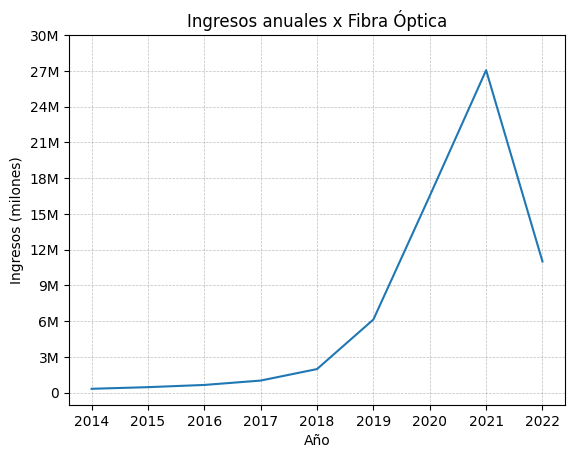

In [302]:
plt.ylabel('Ingresos (milones)')
sns.lineplot(data=Ingresos_Anuales_x_Tecnologia, x="Año", y="Fibra óptica")
labels = ['0','3M',  '6M', '9M', '12M', '15M', '18M', '21M','24M','27M','30M']
plt.yticks(range(0, 30000001, 3000000), labels)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
#plt.gca().set_facecolor('lightgray')
# Establecer las etiquetas del eje y

plt.title('Ingresos anuales x Fibra Óptica')
plt.show()

**Podemos apreciar que la mayor parte de los ingresos es por cable modem, luego ADSL que viene cayendo y Fibra Optica con óptimo crecimiento.**

Text(0.5, 1.0, 'Ingresos anuales x Tecnología')

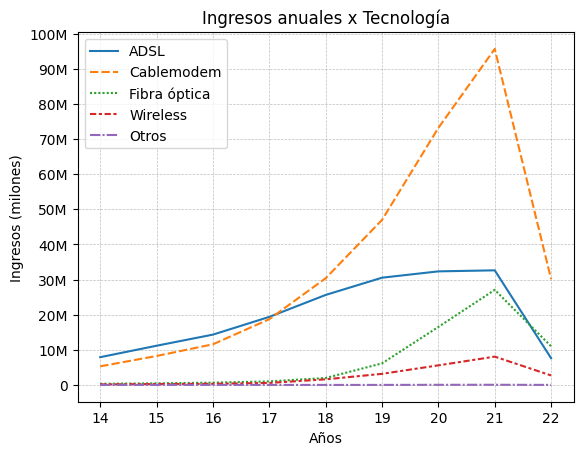

In [318]:
Ingresos_Anuales_x_Tecnologia = Ingresos_Anuales_x_Tecnologia.drop('Ingresos Totales (miles de pesos)', axis= 1)


# Establecer las etiquetas del eje y
sns.lineplot(data=Ingresos_Anuales_x_Tecnologia)
labels = ['0','10M',  '20M', '30M', '40M', '50M', '60M', '70M','80M','90M','100M']
Años = ['14','15',  '16', '17', '18', '19', '20', '21','22']
plt.yticks(range(0, 100000001, 10000000), labels)
plt.xticks(range(0, 9, 1), Años)
plt.ylabel('Ingresos (milones)')
plt.xlabel('Años')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Ingresos anuales x Tecnología')



-----

### Veamos la distribución de conexión a nivel nacional por tipo en el año 2020

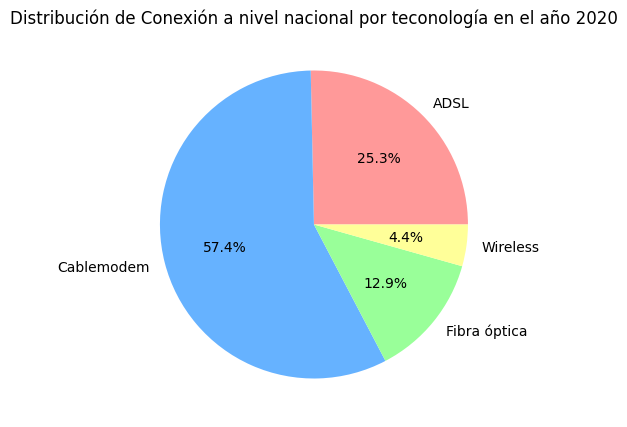

In [259]:

#Veamos la distribución de conexión en 2020
His_2020 = hist_acceso[hist_acceso['Año'] == '2020']

categories = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
values =His_2020[categories].values[0]


plt.figure(figsize=(5, 5))  
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFFF99']
plt.pie(values, labels=categories, autopct='%1.1f%%',  colors=custom_colors)
plt.title('Distribución de Conexión a nivel nacional por teconología en el año 2020')
plt.show()


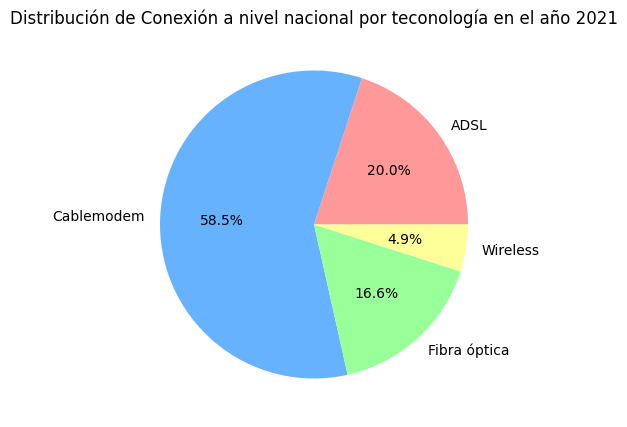

In [260]:

#Veamos la distribución de conexión en 2021
His_2021 = hist_acceso[hist_acceso['Año'] == '2021']

categories = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
values =His_2021[categories].values[0]


plt.figure(figsize=(5, 5))  
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFFF99']
plt.pie(values, labels=categories, autopct='%1.1f%%',  colors=custom_colors)
plt.title('Distribución de Conexión a nivel nacional por teconología en el año 2021')
plt.show()


## Desarrollo de conectividad historica de fibra óptica.


----

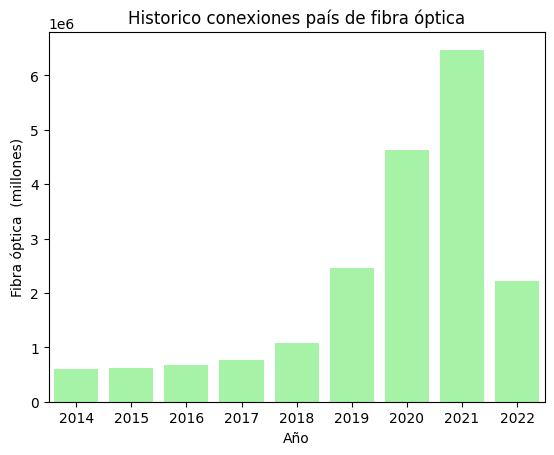

In [40]:
sns.barplot(data=hist_acceso, x="Año", y="Fibra óptica", color='#99FF99')
plt.ylabel('Fibra óptica  (millones)')
plt.title('Historico conexiones país de fibra óptica')
plt.show()

**La conexión por FO a crecido abruptamente a partir del año 2019**

----

---

**En Conclusión el desarrollo historico a nivel país de fibra óptica tuvo un activo desarrollo a partir del año 2019, llegando al primer trimestre de 2022 a cubrir casi la misma cantidad de clientes que en todo el año 2019. Por eso se espera que este desarrollo continue hasta llegar a 8.500.00 clientes**






------



# EDA Fibra óptica por provincia para el año 2021

In [249]:
Nacion_FO_2021 = acceso_fijo_pcia[acceso_fijo_pcia['Año']=='2021'].drop(['Trimestre', 'Año'] , axis=1)

Nacion_FO_2021= (
    Nacion_FO_2021.groupby('Provincia')
    .sum()
    .sort_values('Fibra óptica', ascending= False)
    .reset_index()
)
Nacion_FO_2021

,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,Buenos Aires,2244988,10257877,3737407,459467,251,16953119
1,Córdoba,941416,1877189,671198,228975,55,3775319
2,Santa Fe,1013109,1740924,383668,170140,65,3374752
3,Tucumán,459947,173434,291391,8590,2712,936074
4,Mendoza,334663,282929,263561,86620,2489,972120
5,Capital Federal,563056,4717425,184269,22877,116,5605552
6,Salta,202348,383329,139229,22999,25,774451
7,Chaco,156846,251003,115281,32045,7,564115
8,Catamarca,81419,39402,88450,4851,8,223056
9,Río Negro,186937,174967,87492,60614,72,583590


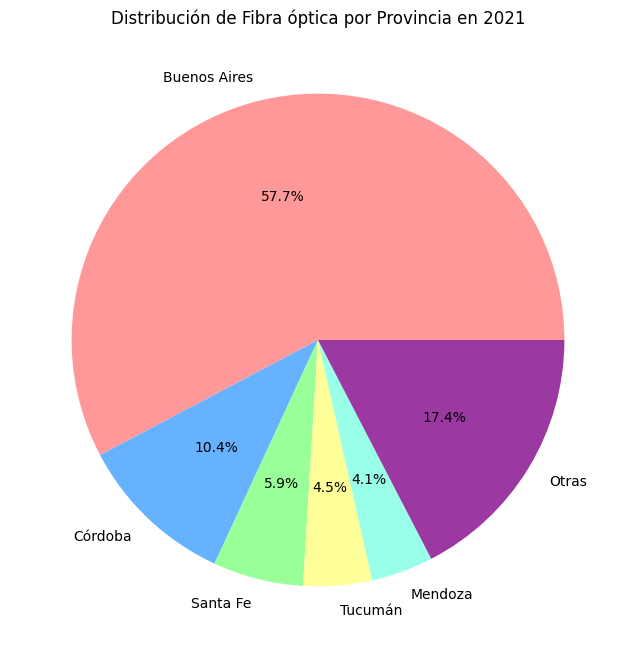

In [255]:
# Filtrar y sumar la columna "Fibra óptica" para las primeras cuatro provincias
top_provincias = Nacion_FO_2021[Nacion_FO_2021['Provincia'].isin(['Buenos Aires', 'Córdoba', 'Santa Fe', 'Tucumán', 'Mendoza'])]
top_provincias_sum = top_provincias['Fibra óptica'].sum()

# Crear una nueva fila para las demás provincias agrupadas como "Otras" y obtener la suma de "Fibra óptica"
df_otros = Nacion_FO_2021[~Nacion_FO_2021['Provincia'].isin(['Buenos Aires', 'Córdoba', 'Santa Fe', 'Tucumán','Mendoza'])]
otros_sum = df_otros['Fibra óptica'].sum()

otros_row = pd.DataFrame({
    'Provincia': ['Otras'],
    'Fibra óptica': [otros_sum]
})

df_combined = pd.concat([top_provincias, otros_row])

# Calcular el porcentaje de "Fibra óptica" para las primeras cuatro provincias y "Otras"
df_combined['Porcentaje'] = df_combined['Fibra óptica'] / df_combined['Fibra óptica'].sum() * 100

# Crear el gráfico circular (pie chart)
plt.figure(figsize=(8, 8))
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFFF99', '#99ffe9', '#9b38a1']
plt.pie(df_combined['Porcentaje'], labels=df_combined['Provincia'], autopct='%1.1f%%', colors= custom_colors)
plt.title('Distribución de Fibra óptica por Provincia en 2021')
plt.show()


**Vemos con la provincia de Buenos Aires se mantiene en el primer lugar en 2021 con 3.737.407 conexiones de fibra óptica. Más del 50% del total de conexiones a nivel país. La capital federal que se encontraba en segundo lugar en el 2019 con 128.797 conexiones, fué bajando producto del crecimiento de las provincias de Córdoba, Santa Fe y Mendoza.**

# Desarrollo Fibra Óptica por Provincia y por Año

Tomamos las 5 provincias con mayor desarrollo anual

In [256]:
#Agrupamos las provincias con fibra optica por año. 
provincias_fibra_por_año = acceso_fijo_pcia.groupby(['Año', 'Provincia'])['Fibra óptica'].sum().reset_index()
#las ordenamos de mayor a menor
provincias_fibra_por_año = provincias_fibra_por_año.sort_values(['Año', 'Fibra óptica'], ascending=[True, False])
#tomamos las 4 primeras provincias por año
provincias_fibra_por_año = provincias_fibra_por_año.groupby('Año').head(5)
provincias_fibra_por_año



,Año,Provincia,Fibra óptica
0,2014,Buenos Aires,485970
1,2014,Capital Federal,70537
20,2014,Santa Fe,13756
12,2014,Mendoza,10006
14,2014,Neuquén,4008
24,2015,Buenos Aires,466696
25,2015,Capital Federal,89912
34,2015,La Pampa,15339
44,2015,Santa Fe,12776
36,2015,Mendoza,10258


### Desarrollo Fibra Óptica Histórico en la Provincia de Bs As

----

In [26]:

His_Fo_BS_AS = (
    acceso_fijo_pcia[acceso_fijo_pcia['Provincia'] == 'Buenos Aires']
    .groupby('Año')['Fibra óptica']
    .sum()
    .reset_index(name='Fibra óptica')
)

His_Fo_BS_AS

,Año,Fibra óptica
0,2014,485970
1,2015,466696
2,2016,456511
3,2017,494072
4,2018,730038
5,2019,1813913
6,2020,2997838
7,2021,3737407
8,2022,1242121


#### Del año 2018 al año 2019 hay una duplicación de clientes conectados a fibra óptica. Producto de la inversión en el desarrollo de nuevos Km de tendido y de campañas publicitarias. Bs As pasa de tener 730.038 clientes conectados con fibra óptica a 1.813.913 clientes en el año 2019. Duplicó rapidamente su conectividad en fibra óptica. Su punto máximo de clientes se encuentra en el año 2021 con un total de 3.737.407

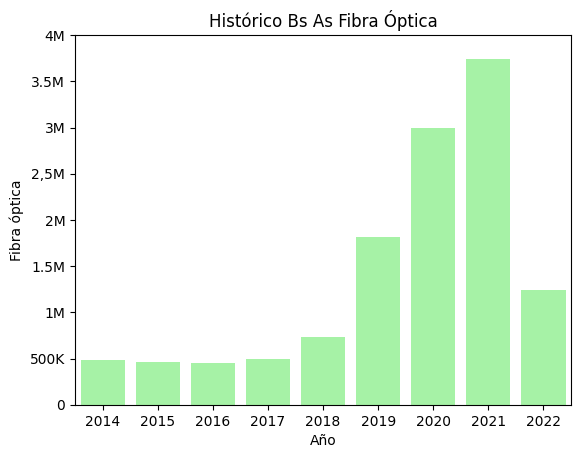

In [27]:
# Crear el gráfico de barras
sns.barplot(data=His_Fo_BS_AS, x="Año", y="Fibra óptica", color='#99FF99')
# Generar la lista de etiquetas personalizada
labels = ['0','500K',  '1M', '1.5M', '2M', '2,5M', '3M', '3.5M','4M']
# Establecer las etiquetas del eje y
plt.yticks(range(0, 4000001, 500000), labels)
plt.ylabel('Fibra óptica')

# Título del gráfico
plt.title('Histórico Bs As Fibra Óptica')

# Mostrar el gráfico
plt.show()


## Desarrollo histórico de fibra óptica en Córdoba

In [42]:
His_Fo_Cordoba = (
    acceso_fijo_pcia[acceso_fijo_pcia['Provincia'] == 'Córdoba']
    .groupby('Año')['Fibra óptica']
    .sum()
    .reset_index(name='Fibra óptica')
)
His_Fo_Cordoba

,Año,Fibra óptica
0,2014,1561
1,2015,2780
2,2016,8291
3,2017,32679
4,2018,60470
5,2019,126324
6,2020,382167
7,2021,671198
8,2022,235838


Veamos el crecimiento anual de la fibra óptica en Córdoba. Del año 2018 al año 2019 hay un gran salto. Producto de la inversión en el desarrollo de nuevos Km de tendido de 
Fibra Óptica. Cordoba pasa de tener 60.470 clientes conectados con fibra óptica a 126.324 clientes en el año 2019. Duplicó rapidamente también su conectividad cómo Bs As. Su punto máximo de clientes se encuentra en el año 2021 con un total de 671.198. Está muy por debajo de lo que es Bs As.

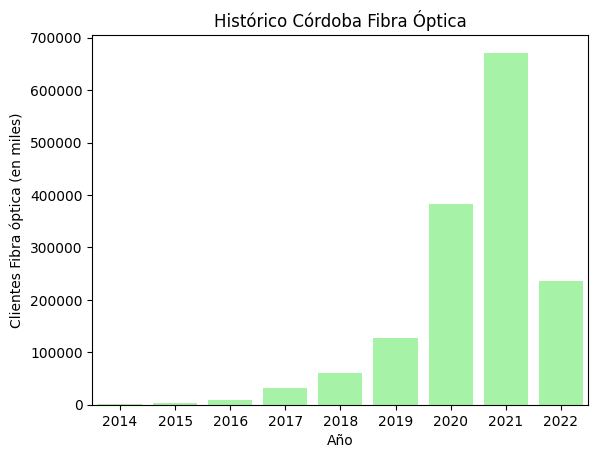

In [41]:
sns.barplot(data=His_Fo_Cordoba, x="Año", y="Fibra óptica", color='#99FF99')
# Establecer las etiquetas del eje y
plt.ylabel('Clientes Fibra óptica (en miles)')

# Título del gráfico
plt.title('Histórico Córdoba Fibra Óptica')

# Mostrar el gráfico
plt.show()

## Desarrollo histórico de fibra óptica en Capital Federal

En capital federal notamos un desarrollo progresivo desde el 2014, notando una caida de clientes en el año 2018 y 2019. Ya en el 2020 se logra superar esa caida y continuar con su crecimiento hasta llegar en 2021 a tener 184.269 clientes conectados. En el primer trimestre de 2022 ya vemos un resultado de 62.308 conexiones por lo que se esperan llegar a 249.232 clientes

In [30]:
His_Fo_CapFed = (
    acceso_fijo_pcia[acceso_fijo_pcia['Provincia'] == 'Capital Federal']
    .groupby('Año')['Fibra óptica']
    .sum()
    .reset_index(name='Fibra óptica')
)
His_Fo_CapFed

,Año,Fibra óptica
0,2014,70537
1,2015,89912
2,2016,147958
3,2017,146645
4,2018,139881
5,2019,128797
6,2020,157687
7,2021,184269
8,2022,62308


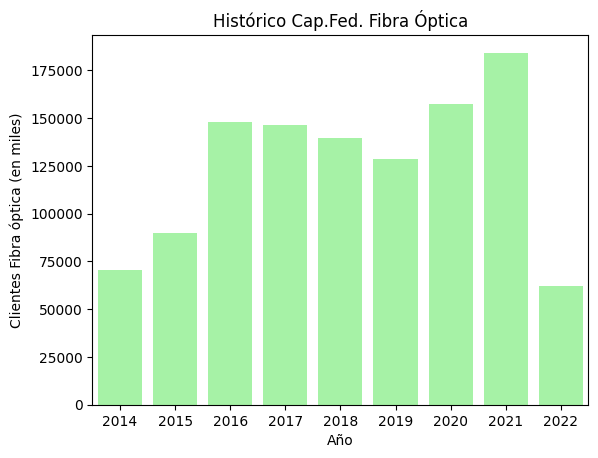

In [31]:
sns.barplot(data=His_Fo_CapFed, x="Año", y="Fibra óptica", color='#99FF99')
# Establecer las etiquetas del eje y
plt.ylabel('Clientes Fibra óptica (en miles)')

# Título del gráfico
plt.title('Histórico Cap.Fed. Fibra Óptica')

# Mostrar el gráfico
plt.show()

## Desarrollo histórico de fibra óptica en Santa Fe

En Santa Fe notamos un desarrollo progresivo desde el 2014 hasta la actualidad, duplicando año a año esa cifra. En el primer trimestre de 2022 ya vemos un resultado de 146.552 conexiones por lo que se esperan llegar a 760.000 clientes 

In [65]:
His_Fo_SantaFe = (
    acceso_fijo_pcia[acceso_fijo_pcia['Provincia'] == 'Santa Fe']
    .groupby('Año')['Fibra óptica']
    .sum()
    .reset_index(name='Fibra óptica')
)
His_Fo_SantaFe

,Año,Fibra óptica
0,2014,13756
1,2015,12776
2,2016,12233
3,2017,23384
4,2018,48164
5,2019,80011
6,2020,190234
7,2021,383668
8,2022,146552


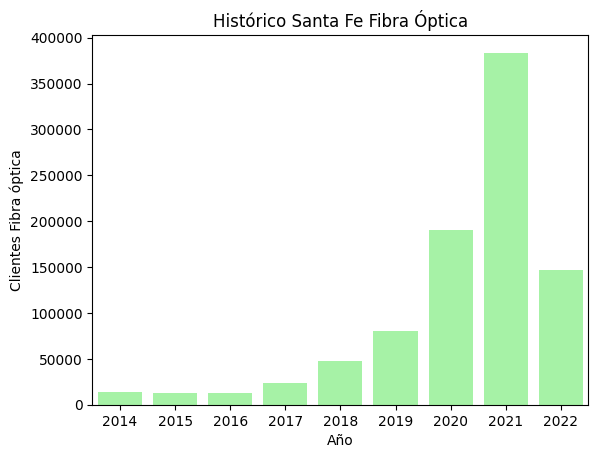

In [68]:
sns.barplot(data=His_Fo_SantaFe, x="Año", y="Fibra óptica", color='#99FF99')
# Establecer las etiquetas del eje y
plt.ylabel('Clientes Fibra óptica')

# Título del gráfico
plt.title('Histórico Santa Fe Fibra Óptica')

# Mostrar el gráfico
plt.show()

# EDA POR LOCALIDADES

-----

In [71]:
conectividad_Localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           3836 non-null   float64
 14  Latitud        4312 non-null   float64
 15  Longitud       4312 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.1+ KB


In [72]:
conectividad_Localidades.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,SI,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,SI,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,--,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


In [74]:
conectividad_Localidades['FIBRAOPTICA'].value_counts()

--    2991
SI    1321
Name: FIBRAOPTICA, dtype: int64

In [82]:
# filtramos las localidades y nos quedamos con las que tienen fibra optica. 
Conectividad_Localidades_FO = conectividad_Localidades[conectividad_Localidades['FIBRAOPTICA'] != '--']
Conectividad_Localidades_FO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 4300
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      1321 non-null   object 
 1   Partido        1321 non-null   object 
 2   Localidad      1321 non-null   object 
 3   Poblacion      1321 non-null   int64  
 4   ADSL           1321 non-null   object 
 5   CABLEMODEM     1321 non-null   object 
 6   DIALUP         1321 non-null   object 
 7   FIBRAOPTICA    1321 non-null   object 
 8   SATELITAL      1321 non-null   object 
 9   WIRELESS       1321 non-null   object 
 10  TELEFONIAFIJA  1321 non-null   object 
 11  3G             1321 non-null   object 
 12  4G             1321 non-null   object 
 13  link           1266 non-null   float64
 14  Latitud        1321 non-null   float64
 15  Longitud       1321 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 175.4+ KB


**De esta base obtenemos las localidades que cuentan con fibra optica.**

In [92]:
Conectividad_Localidades_FO.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,SI,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
11,BUENOS AIRES,9 de Julio,9 de Julio,36494,SI,SI,SI,SI,--,SI,SI,SI,SI,6588100.0,-35.444744,-60.884343
16,BUENOS AIRES,Carmen de Areco,Carmen de Areco,12775,SI,SI,SI,SI,--,SI,SI,SI,SI,6161010.0,-34.377699,-59.822902
19,BUENOS AIRES,Castelli,Castelli,6859,SI,SI,--,SI,SI,SI,SI,SI,SI,6168010.0,-36.091694,-57.807180
20,BUENOS AIRES,Castelli,Centro Guerrero,114,--,--,--,SI,--,SI,--,--,--,6168020.0,-36.057062,-57.823542


## Buenos Aires: Fibra optica por localidad

In [97]:
conectividad_Localidades_BsAs = Conectividad_Localidades_FO[Conectividad_Localidades_FO['Provincia']== 'BUENOS AIRES']
conectividad_Localidades_BsAs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 4251
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      411 non-null    object 
 1   Partido        411 non-null    object 
 2   Localidad      411 non-null    object 
 3   Poblacion      411 non-null    int64  
 4   ADSL           411 non-null    object 
 5   CABLEMODEM     411 non-null    object 
 6   DIALUP         411 non-null    object 
 7   FIBRAOPTICA    411 non-null    object 
 8   SATELITAL      411 non-null    object 
 9   WIRELESS       411 non-null    object 
 10  TELEFONIAFIJA  411 non-null    object 
 11  3G             411 non-null    object 
 12  4G             411 non-null    object 
 13  link           403 non-null    float64
 14  Latitud        411 non-null    float64
 15  Longitud       411 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 54.6+ KB


## Córdoba: Fibra optica por localidad

In [96]:
conectividad_Localidades_Cordoba = Conectividad_Localidades_FO[Conectividad_Localidades_FO['Provincia']== 'CORDOBA']
conectividad_Localidades_Cordoba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 82 to 4263
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      165 non-null    object 
 1   Partido        165 non-null    object 
 2   Localidad      165 non-null    object 
 3   Poblacion      165 non-null    int64  
 4   ADSL           165 non-null    object 
 5   CABLEMODEM     165 non-null    object 
 6   DIALUP         165 non-null    object 
 7   FIBRAOPTICA    165 non-null    object 
 8   SATELITAL      165 non-null    object 
 9   WIRELESS       165 non-null    object 
 10  TELEFONIAFIJA  165 non-null    object 
 11  3G             165 non-null    object 
 12  4G             165 non-null    object 
 13  link           164 non-null    float64
 14  Latitud        165 non-null    float64
 15  Longitud       165 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 21.9+ KB


## Localidades con fibra optica

In [339]:
Tecnologia_Localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3127 non-null   object 
 1   Partido        3127 non-null   object 
 2   Localidad      3127 non-null   object 
 3   Link Indec     3127 non-null   object 
 4   ADSL           3127 non-null   object 
 5   CABLEMODEM     3127 non-null   object 
 6   DIAL UP        3127 non-null   object 
 7   FIBRA OPTICA   3127 non-null   object 
 8   OTROS          3127 non-null   object 
 9   SATELITAL      3127 non-null   object 
 10  WIMAX          3127 non-null   object 
 11  WIRELESS       3127 non-null   object 
 12  Total general  3127 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 342.1+ KB


## Observamos que las Provincias con mayor cantidad de clientes de fibra óptica se encuentran en Cordoba, Buenos Aires, Tucuman, CABA y Santa Fe


----

In [350]:
FO_Localidad = Tecnologia_Localidad[Tecnologia_Localidad['FIBRA OPTICA'] != '- 0']
FO_Localidad['FIBRA OPTICA']= FO_Localidad['FIBRA OPTICA'].str.replace('.', '').astype(int)
FO_Localidad = FO_Localidad.sort_values(by=['FIBRA OPTICA'], ascending=False).reset_index()
FO_Localidad.head(10)


C:\Users\User\AppData\Local\Temp\ipykernel_9300\2016598111.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  FO_Localidad['FIBRA OPTICA']= FO_Localidad['FIBRA OPTICA'].str.replace('.', '').astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_9300\2016598111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FO_Localidad['FIBRA OPTICA']= FO_Localidad['FIBRA OPTICA'].str.replace('.', '').astype(int)


,index,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,953,CORDOBA,Capital,Córdoba,14014010,77.123,249.312,47,139616,1.218,11,- 0,4.288,471.615,NaN
1,258,BUENOS AIRES,General Pueyrredón,Mar del Plata,6357110,17.240,124.995,538,87500,41,7,- 0,1.117,231.438,NaN
2,3065,TUCUMAN,Capital,San Miguel de Tucumán (Est. Tucumán),90084010,63.220,46.832,30,74065,338,15,- 0,505,185.005,NaN
3,712,CABA,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,2000010,102.290,1.217.225,2.163,62308,27.708,63,- 0,5.784,1.417.541,NaN
4,2796,SANTA FE,Rosario,Rosario,82084270,65.463,205.441,78,43874,158,1,- 0,5.229,320.244,NaN
5,359,BUENOS AIRES,La Plata,La Plata,6441030,13.604,162.633,548,37212,280,9,- 0,3.241,217.527,NaN
6,2743,SANTA FE,La Capital,Santa Fe,82063170,23.446,65.855,33,32295,2.061,9,- 0,104,123.803,NaN
7,2275,SALTA,Capital,Salta,66028050,18.232,76.591,5,31933,85,8,- 0,1.509,128.363,NaN
8,1842,MENDOZA,Capital,Mendoza,50007010,8.692,64.800,186,29203,27,14,- 0,2.057,104.979,NaN
9,338,BUENOS AIRES,La Matanza,Isidro Casanova,6427010,363,21.213,34,25819,26,- 0,- 0,231,47.686,NaN


### Velocidad de bajada por localidad

Las Localidades con mayor velocidad de bajada son: CABA con 427.452 usuarios, Cordoba Capital con 119.847 usuarios, Rosario con 63.002 usuarios, Mar del Plata con 54.420 usuarios, La Plata con 53.759 usuarios y San Miguel de Tucumán con 42.076

In [351]:
Max_Vel_localidades = Bajada_Localidad.sort_values(by=['100 Mbps'], ascending=False)
Max_Vel_localidades.head(10)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,75 Mbps,78 Mbps,80 Mbps,82 Mbps,83 Mbps,85 Mbps,90 Mbps,92 Mbps,95 Mbps,100 Mbps
707,CABA,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,2000010,1717.0,31.0,NaN,461.0,35.0,NaN,...,31684.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,427452.0
948,CORDOBA,Capital,Córdoba,14014010,13.0,2.0,NaN,10.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119847.0
2752,SANTA FE,Rosario,Rosario,82084270,9.0,NaN,NaN,8.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63002.0
262,BUENOS AIRES,General Pueyrredón,Mar del Plata,6357110,4.0,NaN,NaN,36.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54420.0
364,BUENOS AIRES,La Plata,La Plata,6441030,142.0,1.0,NaN,71.0,2.0,NaN,...,1195.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,53759.0
3024,TUCUMAN,Capital,San Miguel de Tucumán (Est. Tucumán),90084010,8.0,NaN,NaN,8.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42076.0
2694,SANTA FE,La Capital,Santa Fe,82063170,18.0,2.0,NaN,9.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,24879.0
2226,SALTA,Capital,Salta,66028050,27.0,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22120.0
2075,NEUQUEN,Confluencia,Neuquén,58035070,6266.0,NaN,NaN,25.0,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20090.0
1472,ENTRE RIOS,Paraná,Paraná,30084160,3.0,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19997.0


# En conclusión el desarrollo de fibra optica en la provincia de Buenos aires a crecido de manera vertiginosa a partir del año 2019, logrando un total de ingresos de....  es por eso que para la próxima campaña publicitaria de fibra optica esará enfocada exclusivamente a la provincia de Bs As